In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/home/subodh/ml/car.data')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.shape

(1727, 7)

In [5]:
df.size

12089

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [7]:
df.columns = col_names

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


From above it is seen that all columns are of Object type. That means they are not clearly int or float but mixture of string, int and float. So we have to convert them into integers before fetching the data into our model because computer can only process numerical values but not strings.</br>
</br>
__Target Type__
#class is our target. So lets find out whether it contains binary target class/labels
#or it contains multiple taget class/labels.
For this we can check how many unique value are present in that column. 

In [9]:
uniq_data = []
for i in df['class']:
    if i not in uniq_data:
        uniq_data.append(i)
print(uniq_data)

['unacc', 'acc', 'vgood', 'good']


In [10]:
df['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

So it is found that our target contains different classes. So we have to built a model that can classify the supplied attributes into these four categories. </br>
For this, we can have different approaches.</br>

1st) We can change these labels into numbers by simply replacing them by integers. For example replace 'unacc' by 0 and so on.</br>
for this we can manually use .replace({}) function or we can use the LableEncoder function from scikit learn library. </br>

2nd) We can use the one hot encoding teching to convert object type data into integers. </br>

But we will have some problem in first approach if we are building neural network. </br>

In neural network we use some activation function to output the calculation from each layer. These activation function are usually Sigmoid and Softmax. We use Sigmoid for binary classification and softmax for multiclass classification. Sigmoid outputs different values between 0 and 1. These are termed as the probabilities. For example we are performing binary classification in neural network. At that case, we use only one neuron at the output layer. The activation funtion will be 'Sigmoid'. It will ouput values between 0 and 1. Those examples whose output values will be near to 0s can be considered as examples belonging to class 0 and those example whose output will be close to 1 can be considered as the examples belonging to class 1. But what about those values which are at the middle of both ends? These values also can be divided into one of the classes but with high error. 
</br>

Similarly, if we are performing multiclass classification, the true problem will not be presented to the model, as out target will contain single column having different integers representing the classes. </br>
</br>
To cast our real problem in the model, we will use one hot ecoding:</br>
['apple', 'orange', 'mango']</br>
[[1, 0, 0]</br>
  0, 1, 0]</br>
 [0, 0, 1]]</br>


In [11]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [12]:
X = df.iloc[:,0:6]
y = df.iloc[:,6:]

In [13]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [14]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1722,good
1723,vgood
1724,unacc
1725,good


In [15]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [16]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [17]:
y

,class_acc,class_good,class_unacc,class_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
1722,0,1,0,0
1723,0,0,0,1
1724,0,0,1,0
1725,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [19]:
X_train.shape, X_test.shape

((1157, 21), (570, 21))

In [20]:
#X_train.shape[1]
y_train.shape

(1157, 4)

Now lets build a classification model using neural network architecture

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

2022-10-02 20:33:21.613787: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-02 20:33:21.613867: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
model = Sequential()
model.add(Dense(44, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',
             metrics=['accuracy'])

2022-10-02 20:33:27.261139: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-02 20:33:27.261282: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-02 20:33:27.261378: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (subodh-Inspiron-5570): /proc/driver/nvidia/version does not exist
2022-10-02 20:33:27.263764: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 44)                968       
                                                                 
 dense_1 (Dense)             (None, 4)                 180       
                                                                 
Total params: 1,148
Trainable params: 1,148
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=100, validation_split=0.2)


Epoch 1/100
10/10 [==============================] - 2s 70ms/step - loss: 1.2638 - accuracy: 0.4400 - val_loss: 1.1094 - val_accuracy: 0.5991
Epoch 2/100
10/10 [==============================] - 0s 13ms/step - loss: 1.0280 - accuracy: 0.6757 - val_loss: 0.9739 - val_accuracy: 0.6853
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 0.9016 - accuracy: 0.7092 - val_loss: 0.8869 - val_accuracy: 0.7026
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 0.8161 - accuracy: 0.7059 - val_loss: 0.8243 - val_accuracy: 0.7026
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.7512 - accuracy: 0.7124 - val_loss: 0.7778 - val_accuracy: 0.6940
Epoch 6/100
10/10 [==============================] - 0s 13ms/step - loss: 0.7026 - accuracy: 0.7070 - val_loss: 0.7396 - val_accuracy: 0.7026
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6613 - accuracy: 0.7157 - val_loss: 0.7066 - val_accuracy: 0.7069
Epoch 

10/10 [==============================] - 0s 11ms/step - loss: 0.1476 - accuracy: 0.9546 - val_loss: 0.1944 - val_accuracy: 0.9353
Epoch 59/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1465 - accuracy: 0.9611 - val_loss: 0.1910 - val_accuracy: 0.9267
Epoch 60/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1424 - accuracy: 0.9622 - val_loss: 0.1892 - val_accuracy: 0.9310
Epoch 61/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1398 - accuracy: 0.9632 - val_loss: 0.1866 - val_accuracy: 0.9353
Epoch 62/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1392 - accuracy: 0.9632 - val_loss: 0.1829 - val_accuracy: 0.9397
Epoch 63/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1358 - accuracy: 0.9632 - val_loss: 0.1824 - val_accuracy: 0.9353
Epoch 64/100
10/10 [==============================] - 0s 11ms/step - loss: 0.1334 - accuracy: 0.9600 - val_loss: 0.1802 - val_accuracy: 0.9483
Epoch 65/100

In [25]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [26]:
import matplotlib.pyplot as plt

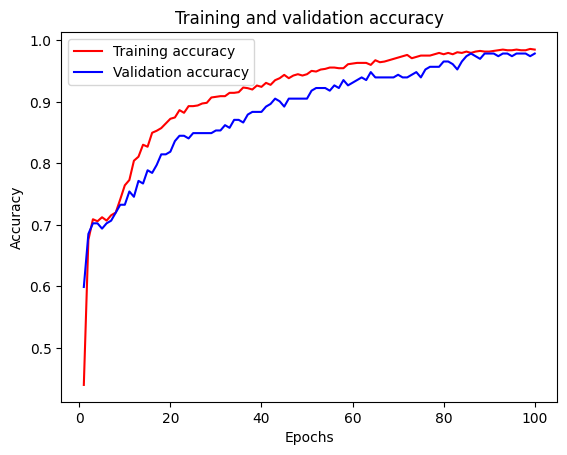

In [27]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

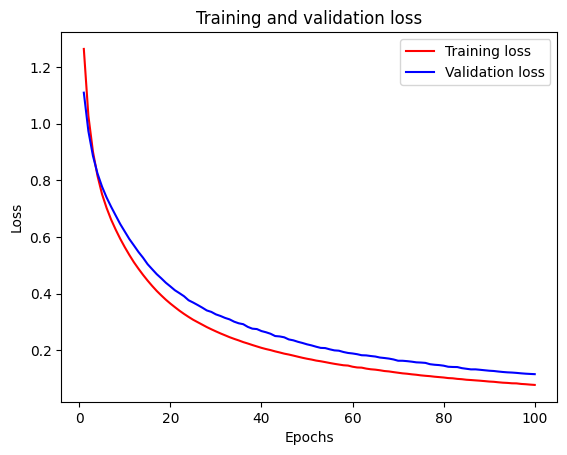

In [28]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [29]:
y_pred = model.predict(X_test)

18/18 [==============================] - 0s 3ms/step


In [30]:
np.argmax(y_pred[1])

2

In [31]:
loss, acc = model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 0.1118 - accuracy: 0.9526


In [32]:
loss, acc

(0.11184793710708618, 0.9526315927505493)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import numpy as np

In [34]:
y_test= np.array(y_test)
y_pred = np.array(y_pred)

In [35]:
# matrix = confusion_matrix(y_test.np.argmax(axis=1), y_pred.np.argmax(axis=1))

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
matrix

array([[115,   5,   7,   0],
       [  1,  11,   0,   6],
       [  5,   0, 394,   0],
       [  1,   2,   0,  23]])

In [36]:
classification = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(classification)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       127
           1       0.61      0.61      0.61        18
           2       0.98      0.99      0.98       399
           3       0.79      0.88      0.84        26

    accuracy                           0.95       570
   macro avg       0.83      0.85      0.84       570
weighted avg       0.95      0.95      0.95       570



In [37]:
acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
acc                    

0.9526315789473684

Now lets fetch some imaginary data to our model and see how it responds. </br>
__Now Imagine we are implementing our model in real world scenario__

In [38]:
df[1500:1505]

,buying,maint,doors,persons,lug_boot,safety,class
1500,low,high,5more,4,big,med,acc
1501,low,high,5more,4,big,high,vgood
1502,low,high,5more,more,small,low,unacc
1503,low,high,5more,more,small,med,acc
1504,low,high,5more,more,small,high,acc


In [39]:

colums = X_train.columns

In [40]:
colums
colums.shape

(21,)

In [41]:
import random
data = []
for i in range(21):
    j = random.randint(0, 1)
    data.append(j)
print(len(data))
data = np.array(data)
data = data.reshape(1,-1)
data.shape
data

21


array([[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]])

In [42]:
# data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
test_df = pd.DataFrame(data, columns = X.columns)

In [43]:
X.iloc[0:1,0:21]

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1


In [44]:
test_df

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,1,1,0,0,1,1,1,1,1,0,...,1,1,1,0,0,1,0,1,1,1


In [45]:
test_y = ['class_acc','class_good','class_unacc','class_vgood']

In [46]:
test_res = model.predict(test_df)
test_res

1/1 [==============================] - 0s 132ms/step


array([[1.9228679e-12, 1.3784732e-22, 1.0000000e+00, 8.1729017e-27]],
      dtype=float32)

In [47]:
np.argmax(test_res)

2

In [48]:
test_y[np.argmax(test_res)] 

'class_unacc'

</br>

</br>

__Multiclass classification using XGBoost__

In [49]:
from xgboost import XGBClassifier

XGBoost is configured to automatically model the multiclass classification problem using the 'multi:softprob' objective.
XGBoost is a statistical algorithm, which will output the single value as a result. 

In [50]:
xg_model = XGBClassifier(learning_rate = 0.3, n_estimators = 100,  max_depth= 6, 
                                        min_child_weight = 1, gamma = 0, subsample =1, 
                              colsample_bytree = 1, reg_alpha = 0, reg_lambda=1, objective ='multi:softprob',
                              tree_method='hist',  n_jobs = -1, use_label_encoder=False)


XGBoost cannot model this problem as-is as it requires that the output variables be numeric.
We can use different technique to transform output or target variables into numeric one from string. But we cannot use one-hot-encoding technique to convert target into multi-dimension series of value. It is not valid in XGBoost or any other statistical algorithms.</br>
We can easily convert the string values to integer values using the LabelEncoder. The three class values (Iris-setosa, Iris-versicolor, Iris-virginica) are mapped to the integer values (0, 1, 2).

In [51]:
X = df.iloc[:,0:6]
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [52]:
X_colms = X.columns
for i in X_colms:
    X = pd.concat([X, pd.get_dummies(X[i], prefix=i)], axis=1 )
    X.drop([i], axis=1, inplace=True)

In [53]:
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1723,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1724,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1725,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1


In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
y = df.iloc[:,6:]
y = np.array(y)
y = y.reshape(-1)
unq = []
for i in y:
    if i not in unq:
        unq.append(i)
unq

['unacc', 'acc', 'vgood', 'good']

In [56]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
ly = label_encoded_y
ly

array([2, 2, 2, ..., 2, 1, 3])

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ly, test_size = 0.33, random_state = 42)

In [58]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [59]:
y_pred = xg_model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.54%


In [61]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[122,   4,   0,   1],
       [  2,  12,   3,   1],
       [  0,   0, 399,   0],
       [  1,   2,   0,  23]])

In [62]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       127
           1       0.67      0.67      0.67        18
           2       0.99      1.00      1.00       399
           3       0.92      0.88      0.90        26

    accuracy                           0.98       570
   macro avg       0.89      0.88      0.88       570
weighted avg       0.98      0.98      0.98       570



In [63]:
test_pred = xg_model.predict(test_df)

In [64]:
test_pred[0]

2

In [65]:
unq = ['unacc','acc','vgood','good']

In [66]:
unql = []
for i in ly:
    if i not in unql:
        unql.append(i)
unql

[2, 0, 3, 1]

In [67]:
if test_pred[0] == 0:
    print('acc')
elif test_pred[0] == 1:
    print('good')
elif test_pred[0] == 2:
    print('unacc')
else:
    print('vgood')

unacc
